# Ce TP est réalisé par le quadrinome :
         Mekdoud Rachid
         Mokhbat Selma
         Kerdjoudj Mohamed
         Hezouat Abdeldjalil

# TP 4 Regression logistique avec régularisation
Dans ce TP, nous aimerions faire une classification binaire en utilisant la régression.

Pour ce faire, nous étudierons un ensemble de données avec la variable  (y) representant la commercialisation d'un profuit et les caractéristiques (X) representant les résultat des tests de qualité test 1 et test 2 du produit.

La prédiction se fera avec l'agorithme de descente du gradient avec régularisation.

# Importation des librairies necessaires au travail

In [557]:
import numpy as np
import matplotlib.pyplot as plt

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [558]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape 

(118, 3)

Dans ces données (data), la première colonne represente le premièr test, la deuxieme colonne le deuxième test et la troisième colonne represente la commercialisation (1 oui 0 non).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [559]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2]
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [560]:
print('X', X.shape ,' y ', y.shape)

X (118, 3)  y  (118, 1)


# Transformation de données
Dans cette partie, nous aimerions transformer nos données afin d'avoir une fonction polynomiale de degrée 6.

La fonction sera:

$x_0=1$

$x_1=x_1$

$x_2=x_2$

$x_3={x_1}^2$

$x_4={x_1}x_2$

$x_5={x_2}^2$

$x_6={x_1}^3$

$x_7={x_1}^2 x_2$

$x_8= x_1 {x_2}^2$

$x_9= {x_2}^3$

...


Pour un polynme de degrée 6 à 2 variables nous aurons 28 caracteristiques

**Question**: comment avons nous trouvé ce chiffre?

**Astuce**: référez vous aux probabilités

In [561]:
def mapping(X):
    cols = 28
    degree=7
    outX= np.ones((X.shape[0],cols))
    X1=X[:,1]
    X2=X[:,2]
    k=0
    for i in range(degree):
        for j in range(i+1):
            outX[:, k] = np.power(X1,i-j)*(np.power(X2,j))
            k=k+1
    return outX    

In [562]:
X2=mapping(X)
X2.shape 

(118, 28)

# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [563]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1/(1+np.exp(-z)) 

In [564]:
k=Sigmoid(-10)
k

4.5397868702434395e-05

In [565]:
def model(X: np.ndarray, theta):
    return Sigmoid(X.dot(theta))

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [566]:
def computeCostReg(X, y, theta, lamdaa):
    m = len(y)
    h = Sigmoid(X.dot(theta))
    J = (-1/m) * (np.sum(y*np.log(h) + (1-y)*np.log(1-h)) + lamdaa * np.sum(theta[1:]**2))
    return J

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [567]:
def gradientDescent(X, y, theta, alpha, iterations,lambdaa):
    # garder aussi le cout à chaque itération 
    # pour afficher le coût en fonction de theta0 et theta1
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 28))
    m=X.shape[0]
    for i in range(iterations):
        theta = theta - (alpha) * (X.T.dot((model(X, theta) - y)) + (lambdaa/m) * theta)
        theta_history[i,:] = theta.T
        cost_history[i] = computeCostReg(X, y, theta,lambdaa)
    return theta, cost_history, theta_history

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [568]:
n=X2.shape[1]
theta = np.zeros((n, 1))
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

Calculer le cout initial

In [569]:
lamdaa = 1  # définir une valeur pour le paramètre de régularisation
initialCost = computeCostReg(X2, y, theta, lamdaa)
print(initialCost)

0.6931471805599454


Appel des la fonction de calcul du gradient

In [570]:
# paramètres
iterations = 1500
alpha = 0.01

# paramètre de regression
lambdaa = 1

# Appel
theta,cost_history, theta_history = gradientDescent(X2, y, theta, alpha, iterations, lambdaa)
print(theta)

[[ 3.4948337 ]
 [ 2.43020572]
 [ 3.86990151]
 [-5.13566415]
 [-4.72591809]
 [-5.80178501]
 [ 1.18519637]
 [-1.54942232]
 [-0.54069296]
 [-0.60527731]
 [-4.39467987]
 [ 0.82838687]
 [-2.51012007]
 [-1.86342833]
 [-3.63360819]
 [-0.81450576]
 [-0.65423129]
 [ 0.96696626]
 [-1.67612418]
 [-1.80757715]
 [ 0.22214245]
 [-3.71587148]
 [ 0.66438509]
 [-1.05370157]
 [ 0.58894135]
 [-1.64393416]
 [-1.55479282]
 [-1.20702328]]


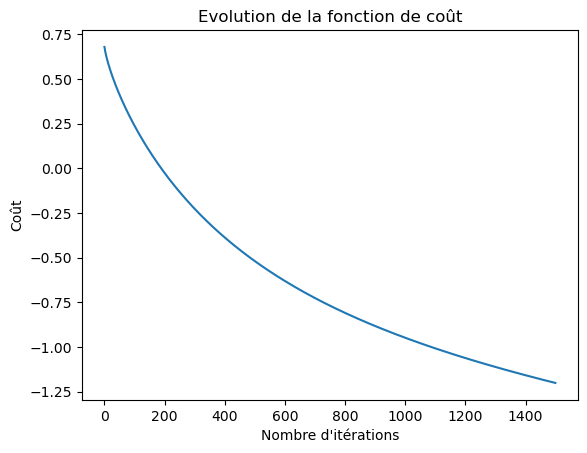

In [571]:
import matplotlib.pyplot as plt

plt.plot(range(iterations), cost_history)
plt.title('Evolution de la fonction de coût')
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Coût')
plt.show()

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

# Classification (Prédiction)
Ici il serait interessant de calculer la prédiction en utilisant un seuil
i.e. si h>seuil alors classe =1 sinon classe = 0

In [572]:
def predict(X):
    h = Sigmoid(X.dot(theta))
    return (h >= 0.5).astype(int)

In [573]:
def drawCircle(X, y, theta):
    # dessiner les points
    plt.scatter(X[:,1], X[:,2], c=y.flatten(), cmap='rainbow')
    plt.title('Données')
    plt.xlabel('Note 1')
    plt.ylabel('Note 2')
    
    # dessiner la frontière de décision
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros((len(u), len(v)))
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = np.dot(mapping(np.array([[1, u[i], v[j]]])), theta)
    z = z.T
    plt.contour(u, v, z, 0)
    plt.show()

# Affichage 
Graphe representant les acceptations selon les caracteristiques

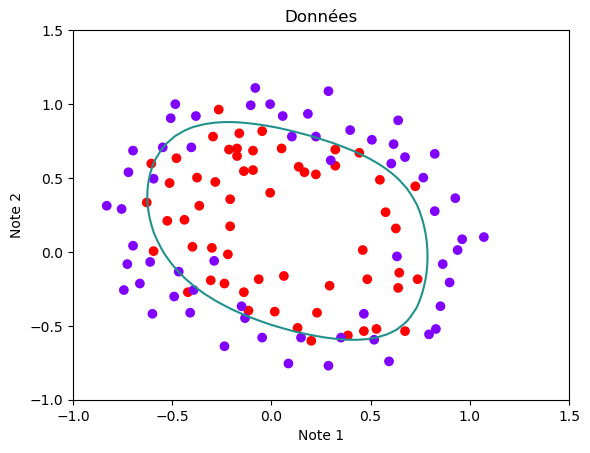

In [574]:
drawCircle(X2, y, theta)

Traçage du coût en fonction de theta0 et theta1

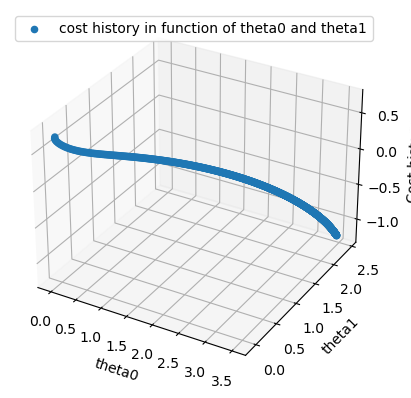

In [575]:
theta_history.shape
ax = plt.axes(projection='3d')
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('Cost history')

ax.scatter3D( theta_history[:,0],theta_history[:,1],cost_history)
ax.legend(["cost history in function of theta0 and theta1"]) 

# Qualité du classifieur

Prédire des valeurs de y

Ici il serait interessant de calculer la précision de notre classifieur

Essayons de calculer ça avec 

moyenne(y==y-pred) * 100

Ceci donnera un pourcentage de precision

In [576]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)
y_pred=predict(X2)
precision = np.mean(y==y_pred)*100
print(precision)

83.89830508474576


# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [577]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)


In [578]:
num_iters = 1000

theta_final, cost_history ,theta_history= gradientDescent(X_train, y_train, np.zeros((X_train.shape[1],1)), alpha, num_iters, lamdaa)
y_pred_test = predict(X_test)
accuracy = np.mean(y_pred_test == y_test) * 100
print("Precision en utilisant notre implémentation : ", accuracy)

Precision en utilisant notre implémentation :  95.83333333333334


In [579]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(penalty='l2', C=1/lamdaa)
clf.fit(X_train, y_train)
y_pred_test_sklearn = clf.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_test_sklearn)*100

c:\Users\rachi\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [580]:
print("Comparaison des précisions : ")
print("Notre implémentation : ", accuracy)
print("Implémentation de scikit-learn : ", accuracy_sklearn)

Comparaison des précisions : 
Notre implémentation :  95.83333333333334
Implémentation de scikit-learn :  83.33333333333334


# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

    1) Expérimentation avec différents hyperparamètres tels que le taux d'apprentissage, le paramètre de régularisation et le nombre d'itérations de la descente de gradient, pour trouver la combinaison optimale qui donne la meilleure précision.
    2) Étudier les techniques d'évaluation de la performance du modèle telles que la matrice de confusion, la précision, le rappel et la courbe ROC, afin de mesurer la qualité de la prédiction et de savoir comment améliorer le modèle.
    3) Appliquer la technique de validation croisée pour évaluer la performance du modèle et éviter le surapprentissage (overfitting) qui pourrait se produire lorsque le modèle est trop complexe.

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le Mardi 02 Mai 2023 


In [581]:
# bonne chance